In [ ]:
#LIBRARIES
from google.colab import files
import pandas as pd
import numpy as np
import nltk
import re
from gensim.utils import simple_preprocess
!pip install camel-tools
from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar

In [ ]:
#upload the txt file 
#files.upload()  #NOTE: comment this line after running the cell

#open dataset after uploading it to colab
txtds = []
with open("/content/OSACT2022-sharedTask-dev.txt") as f:
    txtds = f.readlines()

In [ ]:
txtds[0]

'8888\t@USER افطرت عليك بعقاء واثنين من فروخها الجن 🔪😂\tNOT_OFF\tNOT_HS\tNOT_VLG\tNOT_VIO\n'

In [ ]:
ud = ["\t","\r","\n","\a"]   #undesired characters
files.upload()  #NOTE: comment this line after running the cell
stopwords_list = []
ads = []

#open arabic stopwords list after uploading it to colab
with open("/content/arstopwords.txt") as f:
    stopwords_list = f.readlines()

In [ ]:
#replace all undesired characters with space except EOL \n replace it with NONE
def replaceitem(x):
  for i in range(len(ud)):
    if ud[i] == "\n":
      x = x.replace(ud[i],'')
    else:
      x = x.replace(ud[i],' ')
  return x


#arrange all the tweets with their labels, all in one list
def allInOne(x):
  if x.find("NOT_OFF") != -1:
    idx = x.find("NOT_OFF")
    z = x[:idx-1].split()
    artxt = ' '.join(z[1:])
    ads.append(artxt)
    labels = x[idx:].split()
    for i in range(len(labels)):
      ads.append(labels[i])
    ads.append(';')
  elif x.find("OFF") != -1:
    idx = x.find("OFF")
    z = x[:idx-1].split()
    artxt = ' '.join(z[1:])
    ads.append(artxt)
    labels = x[idx:].split()
    for i in range(len(labels)):
      ads.append(labels[i])
    ads.append(';')

#reducing orthographic ambiguity by removing particular symbols from particular letters
def ortho_normalize(text):
    text = normalize_alef_maksura_ar(text)
    text = normalize_alef_ar(text)
    text = normalize_teh_marbuta_ar(text)
    return text


#clean tweets from any non-arabic letters after that we apply dediacritizating followed with orthographic normalization
def cleanTweets(tweet):
  tweet = re.findall(r"[\u0621-\u064A]+", tweet) #return a list of all the arabic words in the tweet
  tweet = ' '.join(tweet) #concatenate items in the list to a single string
  tweet = dediac_ar(tweet)
  tweet = ortho_normalize(tweet)
  return tweet


#preprocess the tweets and convert the sentence into list of tokens
def preprocess(text):
    result=[]
    for token in simple_preprocess(text) :
        if token not in stopwords_list and len(token) > 2:
            result.append(token)    
    return result


#take arranged list as an argument 
def listToCsv(liSt, ds_name):
  #lists of columns in the dataset
  labels_list = ["OFF", "NOT_OFF", "HS1", "HS2", "HS3", "HS4", "HS5", "HS6", "NOT_HS", "VLG", "NOT_VLG", "VIO", "NOT_VIO"]
  fc = pd.DataFrame(index=np.arange(len(txtds)), columns=["Tweets"])
  rc = pd.DataFrame(0, index=np.arange(len(txtds)), columns=labels_list)
  for i in range(len(txtds)):
    fc["Tweets"][i] = cleanTweets(liSt[i*6])
    rc[liSt[(i*6)+1]][i] = 1
    rc[liSt[(i*6)+2]][i] = 1
    rc[liSt[(i*6)+3]][i] = 1
    rc[liSt[(i*6)+4]][i] = 1

  cls = ["Tweets"] + labels_list
  csvds = pd.concat([fc, rc], axis=1, names=cls)
  csvds.to_csv(ds_name +'.csv', index = False, header=True, encoding="utf-8-sig")
  files.download(ds_name +'.csv')

In [ ]:
#preparing our dataset to preprocess
stopwords_list = list(map(replaceitem, stopwords_list))
list(map(allInOne, list(map(replaceitem, txtds))))
listToCsv(ads)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
d1 = pd.read_csv('/content/drive/MyDrive/datasets/1.csv')
d2 = pd.read_csv('/content/drive/MyDrive/datasets/2.csv')
d3 = pd.read_csv('/content/drive/MyDrive/datasets/3.csv')
d4 = pd.read_csv('/content/drive/MyDrive/datasets/4.csv')
d5 = pd.read_csv('/content/drive/MyDrive/datasets/5.csv')
d6 = pd.read_csv('/content/drive/MyDrive/datasets/6.csv')
d7 = pd.read_csv('/content/drive/MyDrive/datasets/7.csv')
d8 = pd.read_csv('/content/drive/MyDrive/datasets/8.csv')
osc = pd.read_csv('/content/drive/MyDrive/datasets/oscat5.csv')

In [ ]:
OFF = osc.drop(columns=['NOT_OFF', 'NOT_HS', 'HS', 'VLG', 'NOT_VLG', 'VIO', 'NOT_VIO',])
HS = osc.drop(columns=['OFF', 'NOT_OFF', 'NOT_HS', 'VLG', 'NOT_VLG', 'VIO', 'NOT_VIO',])

In [ ]:
for i in range(len(d1)):
  if d1['OFF'][i] == '1':
    OFF.loc[len(OFF.index)] = [cleanTweets(d1['tweet'][i]), 1]
  if d1['HS_NOT_HS'][i] == 0:
    HS.loc[len(HS.index)] = [cleanTweets(d1['tweet'][i]), 1]
for i in range(len(d2)):
  if d2['Offensive'][i] == 'OFF':
    OFF.loc[len(OFF.index)] = [cleanTweets(d2['Tweet'][i]), 1]
  if d2['Hate'][i] == 'HS':
    HS.loc[len(HS.index)] = [cleanTweets(d2['Tweet'][i]), 1]
for i in range(len(d3)):
  if d3['Majority_Label'][i] == 'Offensive':
    OFF.loc[len(OFF.index)] = [cleanTweets(d3['Comment'][i]), 1]
for i in range(len(d4)):
  if d4['Class'][i] == 'abusive':
    OFF.loc[len(OFF.index)] = [cleanTweets(d4['Tweet'][i]), 1]
  if d4['Class'][i] == 'hate':
    HS.loc[len(HS.index)] = [cleanTweets(d4['Tweet'][i]), 1]
for i in range(len(d5)):
  if d5['Offensive'][i] == 'OFF':
    OFF.loc[len(OFF.index)] = [cleanTweets(d5['Tweet'][i]), 1]
  if d5['Hate'][i] == 'HS':
    HS.loc[len(HS.index)] = [cleanTweets(d5['Tweet'][i]), 1]
for i in range(len(d6)):
  if d6['Offensive'][i] == 'OFF':
    OFF.loc[len(OFF.index)] = [cleanTweets(d6['Tweet'][i]), 1]
  if d6['Hate'][i] == 'HS':
    HS.loc[len(HS.index)] = [cleanTweets(d6['Tweet'][i]), 1]
for i in range(len(d7)):
  if d7['Class'][i] == 'abusive':
    OFF.loc[len(OFF.index)] = [cleanTweets(d7['Tweet'][i]), 1]
  if d7['Class'][i] == 'hate':
    HS.loc[len(HS.index)] = [cleanTweets(d7['Tweet'][i]), 1]
for i in range(len(d8)):
  if d8['hate'][i] == 1:
    HS.loc[len(HS.index)] = [cleanTweets(d8['tweet'][i]), 1]

In [ ]:
vc = OFF['OFF'].value_counts()
while(vc[0] < vc[1]):
  
  for i in range(len(d1)):
    vc = OFF['OFF'].value_counts()
    OFF.drop_duplicates(subset=['Tweets'], inplace = True)
    if vc[0] < vc[1]:
      if d1['OFF'][i] == '0':
        OFF.loc[len(OFF.index)] = [cleanTweets(d1['tweet'][i]), 0]
    else:
      break
  
  for i in range(len(d2)):
    vc = OFF['OFF'].value_counts()
    OFF.drop_duplicates(subset=['Tweets'], inplace = True)
    if vc[0] < vc[1]:
      if d2['Offensive'][i] == 'NOT_OFF':
        OFF.loc[len(OFF.index)] = [cleanTweets(d2['Tweet'][i]), 0]
    else:
      break

  for i in range(len(d3)):
    vc = OFF['OFF'].value_counts()
    OFF.drop_duplicates(subset=['Tweets'], inplace = True)
    if vc[0] < vc[1]:
      if d3['Majority_Label'][i] == 'Non-Offensive':
        OFF.loc[len(OFF.index)] = [cleanTweets(d3['Comment'][i]), 0]
    else:
      break

  
  for i in range(len(d4)):
    vc = OFF['OFF'].value_counts()
    OFF.drop_duplicates(subset=['Tweets'], inplace = True)
    if vc[0] < vc[1]:
      if d4['Class'][i] == 'normal':
        OFF.loc[len(OFF.index)] = [cleanTweets(d4['Tweet'][i]), 0]
    else:
      break

  for i in range(len(d5)):
    vc = OFF['OFF'].value_counts()
    OFF.drop_duplicates(subset=['Tweets'], inplace = True)
    if vc[0] < vc[1]:
      if d5['Offensive'][i] == 'NOT_OFF':
        OFF.loc[len(OFF.index)] = [cleanTweets(d5['Tweet'][i]), 0]
    else:
      break

  
  for i in range(len(d6)):
    vc = OFF['OFF'].value_counts()
    OFF.drop_duplicates(subset=['Tweets'], inplace = True)
    if vc[0] < vc[1]:
      if d6['Offensive'][i] == 'NOT_OFF':
        OFF.loc[len(OFF.index)] = [cleanTweets(d6['Tweet'][i]), 0]
    else:
      break

  for i in range(len(d7)):
    vc = OFF['OFF'].value_counts()
    OFF.drop_duplicates(subset=['Tweets'], inplace = True)
    if vc[0] < vc[1]:
      if d7['Class'][i] == 'normal':
        OFF.loc[len(OFF.index)] = [cleanTweets(d7['Tweet'][i]), 0]
    else:
      break

In [ ]:
ss = HS['HS'].value_counts()
while(ss[1] <= ss[0]):
  ss = HS['HS'].value_counts()
  drop_indices = np.random.choice(HS.index, 50, replace=False)
  for i in drop_indices:
    if(ss[1] <= ss[0]):
      if HS['HS'][i] != 1:
        HS.drop(i, inplace = True)
    else:
      break

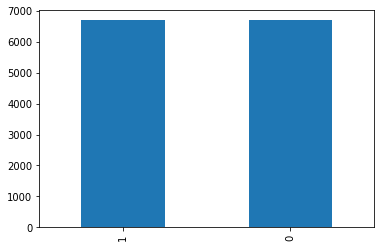

In [ ]:
import matplotlib.pyplot as plt
OFF['OFF'].value_counts().plot(kind='bar')
plt
plt.show()

In [ ]:
OFF.isnull().values.any()

False

In [ ]:
OFF.dropna(inplace=True)

In [ ]:
HS = HS.sample(frac=1, random_state=1).reset_index(drop=True)
OFF = OFF.sample(frac=1, random_state=1).reset_index(drop=True)

In [ ]:
HS.to_csv('HS-NOT_HS.csv', index = False, header=True, encoding="utf-8-sig")
files.download('HS-NOT_HS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>